In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics as st
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import classification_report
import keras


2023-04-02 23:13:39.216602: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Dataset files 

In [2]:
# List of training, validation, and test X_files
X_files = ['TrainingData/subject_001_01__x.csv', 'TrainingData/subject_001_02__x.csv', 
           'TrainingData/subject_001_03__x.csv', 'TrainingData/subject_001_04__x.csv', 
           'TrainingData/subject_001_05__x.csv', 'TrainingData/subject_001_06__x.csv', 
           'TrainingData/subject_001_07__x.csv', 'TrainingData/subject_002_02__x.csv', 
           'TrainingData/subject_002_03__x.csv', 'TrainingData/subject_002_04__x.csv', 
           'TrainingData/subject_002_05__x.csv', 'TrainingData/subject_003_01__x.csv', 
           'TrainingData/subject_003_02__x.csv', 'TrainingData/subject_003_03__x.csv', 
           'TrainingData/subject_004_01__x.csv', 'TrainingData/subject_004_02__x.csv', 
           'TrainingData/subject_005_01__x.csv', 'TrainingData/subject_005_02__x.csv', 
           'TrainingData/subject_005_03__x.csv', 'TrainingData/subject_006_01__x.csv', 
           'TrainingData/subject_006_02__x.csv', 'TrainingData/subject_007_02__x.csv', 
           'TrainingData/subject_007_03__x.csv', 'TrainingData/subject_007_04__x.csv',
           'TrainingData/subject_008_01__x.csv']

val_X_files = ['TrainingData/subject_002_01__x.csv', 'TrainingData/subject_001_08__x.csv']
test_X_files = ['TrainingData/subject_006_03__x.csv', 'TrainingData/subject_007_01__x.csv']

# List of training, validation, and test y_files
y_files = ['TrainingData/subject_001_01__y.csv', 'TrainingData/subject_001_02__y.csv', 
           'TrainingData/subject_001_03__y.csv', 'TrainingData/subject_001_04__y.csv', 
           'TrainingData/subject_001_05__y.csv', 'TrainingData/subject_001_06__y.csv', 
           'TrainingData/subject_001_07__y.csv', 'TrainingData/subject_002_02__y.csv',
           'TrainingData/subject_002_03__y.csv', 'TrainingData/subject_002_04__y.csv', 
           'TrainingData/subject_002_05__y.csv', 'TrainingData/subject_003_01__y.csv', 
           'TrainingData/subject_003_02__y.csv', 'TrainingData/subject_003_03__y.csv', 
           'TrainingData/subject_004_01__y.csv', 'TrainingData/subject_004_02__y.csv', 
           'TrainingData/subject_005_01__y.csv', 'TrainingData/subject_005_02__y.csv', 
           'TrainingData/subject_005_03__y.csv', 'TrainingData/subject_006_01__y.csv', 
           'TrainingData/subject_006_02__y.csv', 'TrainingData/subject_007_02__y.csv', 
           'TrainingData/subject_007_03__y.csv', 'TrainingData/subject_007_04__y.csv',
           'TrainingData/subject_008_01__y.csv']

val_y_files = ['TrainingData/subject_002_01__y.csv', 'TrainingData/subject_001_08__y.csv']
test_y_files = ['TrainingData/subject_006_03__y.csv', 'TrainingData/subject_007_01__y.csv']

## Visuvalising the Data 

In [63]:
l=[]

for i in range(len(y_files)):
    df_X = pd.read_csv(X_files[i],names =['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
    df_y = pd.read_csv(y_files[i],names =['label'])
    e_labels = []
    for label in df_y.iterrows():
        e_labels += [label[1][0]] * 4
    df_y = pd.DataFrame(e_labels)
    df_y.columns = ['label']
    df_X = df_X.join(df_y, how='right')
    l.append(df_X)
df_f = pd.concat(l1, axis=0, ignore_index=True)
df_f

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,1.96,10.07,2.18,0.55,-0.40,-0.25,0
1,0.21,9.69,1.73,0.61,-0.03,-0.15,0
2,0.81,10.02,1.49,0.64,0.37,-0.04,0
3,1.05,7.29,0.48,0.52,0.64,0.17,0
4,0.09,6.00,0.77,0.23,0.87,0.39,0
...,...,...,...,...,...,...,...
1049631,0.31,9.61,3.45,-0.84,-0.23,0.07,0
1049632,0.19,9.55,3.00,-0.85,-0.19,0.11,0
1049633,0.22,9.14,2.44,-0.90,-0.10,0.18,0
1049634,0.80,8.86,2.61,-0.95,-0.07,0.22,0


In [85]:
walking = df_f[df_f.label==0].count()[0]
downstairs = df_f[df_f.label==1].count()[0]
upstairs = df_f[df_f.label==2].count()[0]
grass = df_f[df_f.label==3].count()[0]
print("Walking =",walking,"\nDownstairs = ",downstairs,"\nUpstairs = ",upstairs,"\nGrass = ",grass)

Walking = 786700 
Downstairs =  48264 
Upstairs =  63852 
Grass =  150820


/var/folders/wv/z1909pcj2ns41483bl2mbw7h0000gn/T/ipykernel_8228/2468392991.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


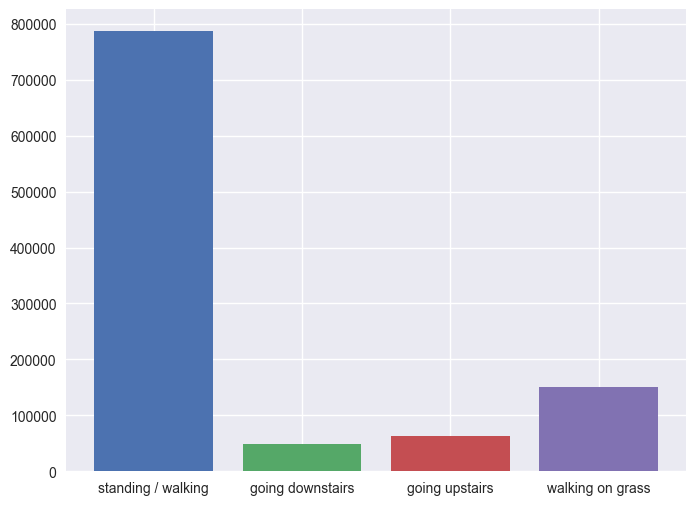

In [19]:
import matplotlib.pyplot as plt

text = ["standing / walking", "going downstairs","going upstairs", "walking on grass"]
label = [walking, downstairs,upstairs, grass]
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,4):
    plt.bar(text[bar],label[bar])

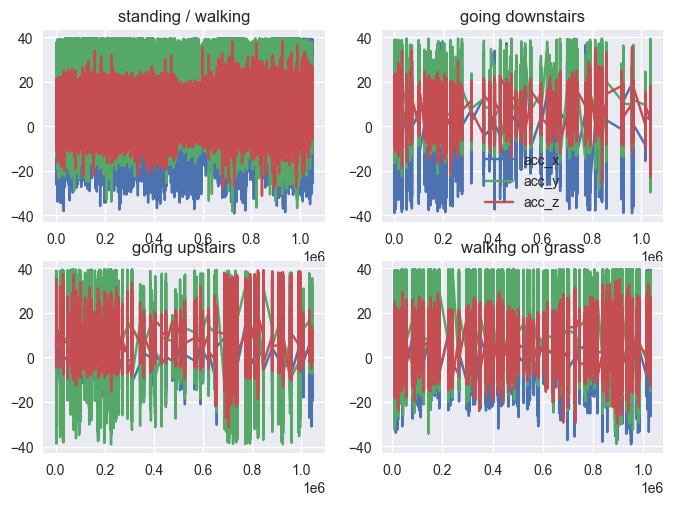

In [75]:
plt.subplot(2,2,1)
plt.plot(df_f[df_f.label==0][['acc_x', 'acc_y', 'acc_z']])
plt.title('standing / walking')
plt.subplot(2,2,2)
plt.plot(df_f[df_f.label==1][['acc_x', 'acc_y', 'acc_z']])
plt.title('going downstairs')
plt.legend(['acc_x','acc_y','acc_z'])
plt.subplot(2,2,3)
plt.plot(df_f[df_f.label==2][['acc_x', 'acc_y', 'acc_z']])
plt.title('going upstairs')
plt.subplot(2,2,4)
plt.plot(df_f[df_f.label==3][['acc_x', 'acc_y', 'acc_z']])
plt.title('walking on grass')
plt.show()

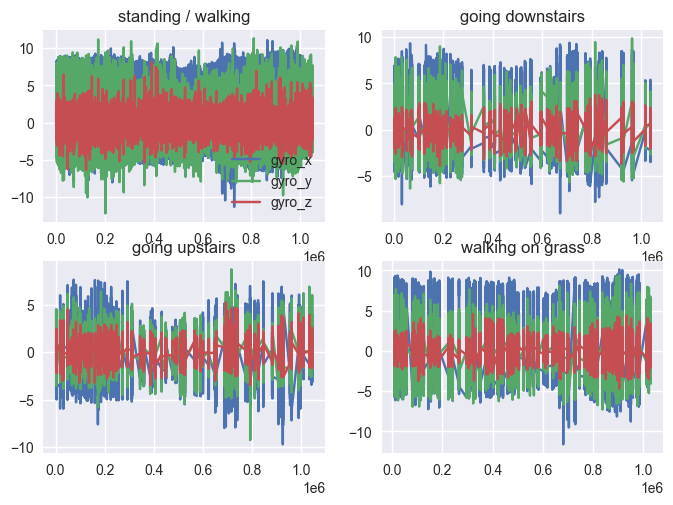

In [73]:

plt.subplot(2,2,1)
plt.plot(df_f[df_f.label==0][['gyro_x', 'gyro_y', 'gyro_z']])
plt.title('standing / walking')
plt.legend(['gyro_x', 'gyro_y', 'gyro_z'],loc='lower right')
plt.subplot(2,2,2)
plt.plot(df_f[df_f.label==1][['gyro_x', 'gyro_y', 'gyro_z']])
plt.title('going downstairs')
plt.subplot(2,2,3)
plt.plot(df_f[df_f.label==2][['gyro_x', 'gyro_y', 'gyro_z']])
plt.title('going upstairs')
plt.subplot(2,2,4)
plt.plot(df_f[df_f.label==3][['gyro_x', 'gyro_y', 'gyro_z']])
plt.title('walking on grass')
plt.show()

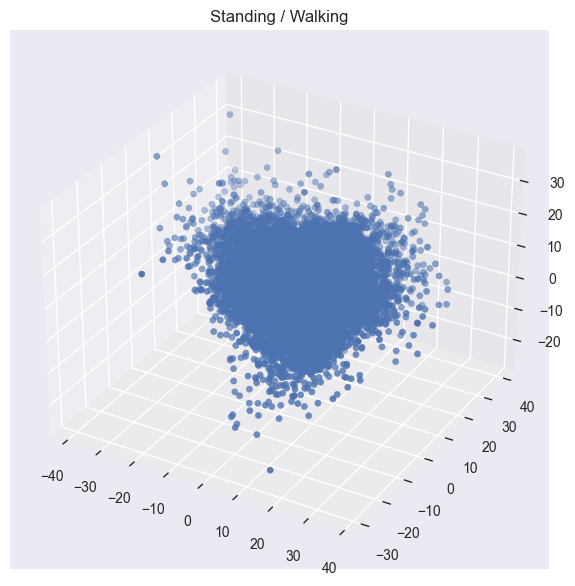

In [90]:
from mpl_toolkits import mplot3d
a_x=df_f[df_f.label==1]['acc_x']
a_y=df_f[df_f.label==1]['acc_y']
a_z=df_f[df_f.label==1]['acc_z']


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(a_x,a_y,a_z,)
plt.title("Standing / Walking")
plt.show()

# preprocessing

In [78]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics as st
from scipy import stats
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def upsampling(X_file, y_file):
    df_X = pd.read_csv(X_file)
    df_y = pd.read_csv(y_file)
    
    extrapolated_labels = []
    for label in df_y.iterrows():
        extrapolated_labels += [label[1][0]] * 4
    
    extrapolated_labels_df = pd.DataFrame(extrapolated_labels)
    difference = df_X.shape[0] - extrapolated_labels_df.shape[0]
    df_X = df_X.iloc[:-difference,:]
    
    return df_X, extrapolated_labels_df


def mode_labels(X, y, time_step, step_size):
    X_values = []
    y_values = []
    for i in range(0, len(X) - time_step, step_size):
        value = X.iloc[i:(i + time_step)].values
        X_values.append(value)
        labels = y.iloc[i:(i + time_step)]
        y_values.append(stats.mode(labels,keepdims=True)[0][0])
    return np.array(X_values),np.array(y_values).reshape(-1, 1)


def create_series_data(X_files, y_files, time_step, step_size):
    aggregate_X = []
    aggregate_y = []
    for i in range(len(y_files)):
        X, y = upsampling(X_files[i], y_files[i])
        X, y = mode_labels(X, y, time_step, step_size)
        aggregate_X.append(X)
        aggregate_y.append(y)
    return np.concatenate(aggregate_X), np.concatenate(aggregate_y)



In [79]:
training_X, training_y = create_series_data(X_files, y_files, 30, 1)
val_X, val_y = create_series_data(val_X_files, val_y_files, 30, 1)
test_X, test_y = create_series_data(test_X_files, test_y_files, 30, 1)

print(training_X.shape, training_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1048786, 30, 6) (1048786, 1)
(111496, 30, 6) (111496, 1)
(84628, 30, 6) (84628, 1)


In [80]:
# Saving the numpy
np.save('processed_data_1/training_X.npy', training_X)
np.save('processed_data_1/training_y.npy', training_y)
np.save('processed_data_1/val_X.npy', val_X)
np.save('processed_data_1/val_y.npy', val_y)
np.save('processed_data_1/test_X.npy', test_X)
np.save('processed_data_1/test_y.npy', test_y)

In [81]:
# Loading the numpy
training_X = np.load('processed_data_1/training_X.npy')
training_y = np.load('processed_data_1/training_y.npy')
val_X = np.load('processed_data_1/val_X.npy')
val_y = np.load('processed_data_1/val_y.npy')
test_X = np.load('processed_data_1/test_X.npy')
test_y = np.load('processed_data_1/test_y.npy')

In [21]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics as st
from scipy import stats
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def get_label_weights(training_y):
    weights = class_weight.compute_class_weight('balanced', classes=np.unique(training_y), y=training_y.ravel())
    label_weights = {i:weights[i] for i in range(len(weights))}
    return label_weights

def one_hot_encoding(labels):
    encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output= False)
    encoder = encoder.fit(labels)
    training_y_encoded = encoder.transform(labels)
    return training_y_encoded

In [22]:

label_weights = get_label_weights(training_y)
print(label_weights)

training_y_encoded = one_hot_encoding(training_y)
val_y_encoded = one_hot_encoding(val_y)
test_y_encoded = one_hot_encoding(test_y)
print(training_y_encoded.shape, val_y_encoded.shape, test_y_encoded.shape)


{0: 0.3333890684562939, 1: 5.455380550122758, 2: 4.121679190115383, 3: 1.7404116772429175}
(1048786, 4) (111496, 4) (84628, 4)


In [17]:
import numpy as np 
import tensorflow as tf
from keras.models import Sequential, model_from_yaml
from keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.python.keras import regularizers
from sklearn.metrics import classification_report


def define_BiLSTM_model(training_X, training_y_encoded):
    n_timesteps, n_features, n_outputs = training_X.shape[1], training_X.shape[2], training_y_encoded.shape[1]
    model = Sequential()
    model.add(Bidirectional(LSTM(units = 125), input_shape = (n_timesteps, n_features)))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(units = 125, activation = 'relu'))
    model.add(Dense(n_outputs, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])
    return model


In [20]:
model = define_BiLSTM_model(training_X, training_y_encoded)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 250)              132000    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_4 (Dense)             (None, 125)               31375     
                                                                 
 dense_5 (Dense)             (None, 4)                 504       
                                                                 
Total params: 163,879
Trainable params: 163,879
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(training_X, training_y_encoded, epochs = 5, batch_size = 64,
                   validation_data = (val_X, val_y_encoded), class_weight = label_weights,
                   verbose = 1, shuffle = True)

Epoch 1/5
16388/16388 [==============================] - 670s 41ms/step - loss: 0.1662 - accuracy: 0.9027 - val_loss: 1.3236 - val_accuracy: 0.6084
Epoch 2/5
16388/16388 [==============================] - 593s 36ms/step - loss: 0.0929 - accuracy: 0.9406 - val_loss: 1.3614 - val_accuracy: 0.6182
Epoch 3/5
16388/16388 [==============================] - 652s 40ms/step - loss: 0.0699 - accuracy: 0.9545 - val_loss: 1.5016 - val_accuracy: 0.6033
Epoch 4/5
16388/16388 [==============================] - 596s 36ms/step - loss: 0.0584 - accuracy: 0.9614 - val_loss: 1.8366 - val_accuracy: 0.5990
Epoch 5/5
16388/16388 [==============================] - 599s 37ms/step - loss: 0.0505 - accuracy: 0.9669 - val_loss: 1.9314 - val_accuracy: 0.5993


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from keras import backend as K

def plot_history(history):
	# Plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # Plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()



In [24]:
model.evaluate(test_X, test_y_encoded)

2645/2645 [==============================] - 27s 10ms/step - loss: 0.2720 - accuracy: 0.9313


[0.2720136046409607, 0.9313347935676575]

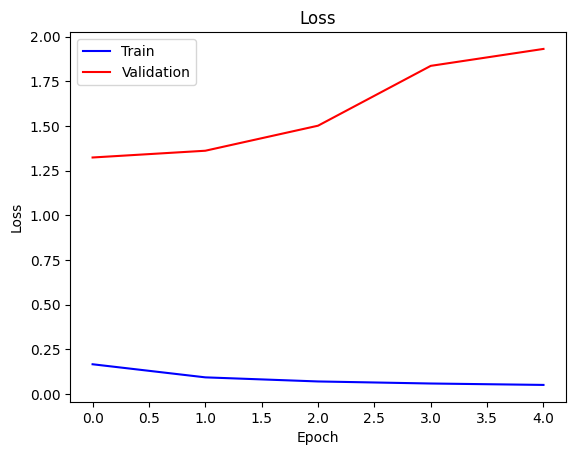

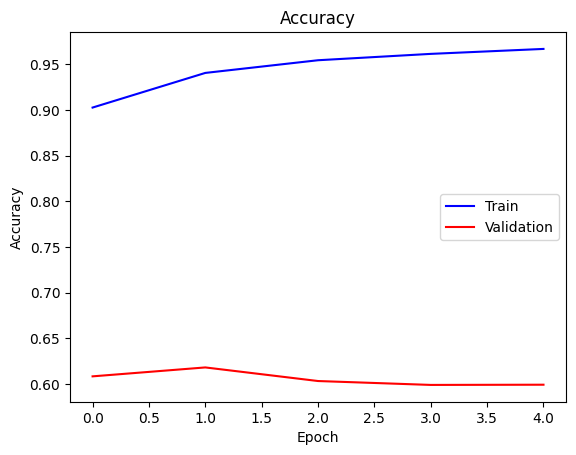

In [31]:
plot_history(history)

# saving the model

In [33]:
model.save('lstm_final.h5')

# loading the model

In [3]:
model=keras.models.load_model('lstm_final.h5')

2023-02-14 01:15:05.580113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.evaluate(test_X, test_y_encoded)

In [24]:
predicted_data = model.predict(test_X, batch_size = 64, verbose = 1)
y_test_bool = np.argmax(predicted_data, axis = 1)
print(classification_report(test_y, y_test_bool))

1323/1323 [==============================] - 22s 16ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     58991
           1       0.85      0.98      0.91      2892
           2       0.94      0.98      0.96      3745
           3       0.91      0.81      0.86     19000

    accuracy                           0.93     84628
   macro avg       0.91      0.93      0.92     84628
weighted avg       0.93      0.93      0.93     84628



In [4]:
test_files = ['TestData/subject_009_01__x.csv']

prediction_files = ['subject_009_01__y_prediction.csv']

In [7]:
def create_test_dataset(X):
        X_values = []
        for i in range(0, len(X)):
                t=[]
                value = X.iloc[i].values
                t.append(value)
                X_values.append(t)        
        return np.array(X_values)

In [8]:
# def create_test_dataset(X, time_steps, step_size):
#     X_values = []
#     for i in range(0, len(X) - time_steps, step_size):
#         value = X.iloc[i:(i + time_steps)].values
#         X_values.append(value)        
#     return np.array(X_values)


In [9]:
for i in range(len(test_files)):
    input_data = pd.read_csv(test_files[i])
    df = input_data
    X_test = create_test_dataset(df)
    y_test = model.predict(X_test, verbose = 1)
    y_test_bool = np.argmax(y_test, axis = 1)
    y_series = pd.Series(y_test_bool)
    y_series.to_csv("predictions/" + prediction_files[i])

1100/1100 [==============================] - 2s 1ms/step


In [27]:
y_series

0        0
1        0
2        0
3        0
4        0
        ..
35156    0
35157    0
35158    0
35159    0
35160    0
Length: 35161, dtype: int64